### Exploring the Titanic dataset

In [99]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
import seaborn as sns

#### Get the data

In [100]:
# Load the data
train_df = pd.read_csv("TitanicTrain.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Clean the Data
- filling in or dropping missing values.

In [101]:
train_df.shape

(891, 12)

In [102]:
# How much data are we missing?
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
# What columns do we have?
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [104]:
# What data types?
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [105]:
# Drop the Cabin feature
train_df = train_df.drop('Cabin', axis=1)

In [106]:
# Look at the age distrubtion
train_df.Age.value_counts(dropna=False).sort_index(ascending=False)

NaN       177
 80.00      1
 74.00      1
 71.00      2
 70.50      1
 70.00      2
 66.00      1
 65.00      3
 64.00      2
 63.00      2
 62.00      4
 61.00      3
 60.00      4
 59.00      2
 58.00      5
 57.00      2
 56.00      4
 55.50      1
 55.00      2
 54.00      8
 53.00      1
 52.00      6
 51.00      7
 50.00     10
 49.00      6
 48.00      9
 47.00      9
 46.00      3
 45.50      2
 45.00     12
         ... 
 23.00     15
 22.00     27
 21.00     24
 20.50      1
 20.00     15
 19.00     25
 18.00     26
 17.00     13
 16.00     17
 15.00      5
 14.50      1
 14.00      6
 13.00      2
 12.00      1
 11.00      4
 10.00      2
 9.00       8
 8.00       4
 7.00       3
 6.00       3
 5.00       4
 4.00      10
 3.00       6
 2.00      10
 1.00       7
 0.92       1
 0.83       2
 0.75       2
 0.67       1
 0.42       1
Name: Age, dtype: int64

In [107]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

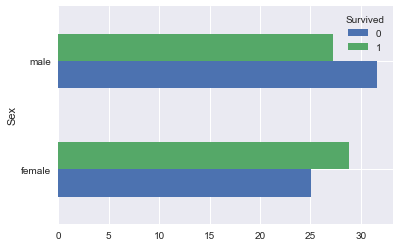

In [108]:
# Average age by Sex and Survival
train_df.groupby(['Sex', 'Survived'])['Age'].mean().unstack(1).plot(kind='barh')
plt.plot();

In [109]:
# Let's look at the raw data
train_df.groupby(['Sex', 'Survived'])['Age'].mean().unstack(1)

Survived,0,1
Sex,,
female,25.046875,28.847716
male,31.618056,27.276022


Thus - we can impute/infer the missing ages for those NaN observations

In [110]:
# Missing values logic
male_survived = ((train_df.Age.isnull()) & (train_df.Sex == 'male') & (train_df.Survived == 1))
male_dead = ((train_df.Age.isnull()) & (train_df.Sex == 'male') & (train_df.Survived == 0))
female_survived = ((train_df.Age.isnull()) & (train_df.Sex == 'female') & (train_df.Survived == 1))
female_dead = ((train_df.Age.isnull()) & (train_df.Sex == 'female') & (train_df.Survived == 0))

In [111]:
# Apply
train_df.ix[male_survived, 'Age'] = 27
train_df.ix[male_dead, 'Age'] = 32
train_df.ix[female_survived, 'Age'] = 29
train_df.ix[female_dead, 'Age'] = 25

In [112]:
# Looks like we filled all the missing Age values :)
train_df[train_df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [113]:
# Are we missing any other values?
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Need to clean the Embarked column

In [114]:
train_df.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [115]:
# Fill the Embarked feature w/ the most occuring embarked location
train_df.Embarked = train_df.Embarked.fillna("S")

In [116]:
# check to see any missing values
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Explore the Data
- Are there any relationships we can find?
- What visuals and conclusions can we draw?

In [117]:
# What are the general survival stats?
train_df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [118]:
# How many men and women are in our training set?
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [119]:
# On a % basis?
male_pct = train_df.Sex.value_counts(normalize=True)[0]
female_pct = train_df.Sex.value_counts(normalize=True)[1]

print("{:.1f}% of men aboard; {:.1f}% of women aboard.".format(100*male_pct, 100*female_pct))

64.8% of men aboard; 35.2% of women aboard.


Let's look at the relationship between sex and survivorship...

In [120]:
# Groupby Sex and Survived
train_df.groupby(['Sex', 'Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [121]:
# Let's compare the values
sex_survival = train_df.groupby(['Sex', 'Survived']).size().unstack(1)
sex_survival

Survived,0,1
Sex,,
female,81,233
male,468,109


In [122]:
# Get the female survivorship (out of all/total survivors)
sex_survival['survive_ratio'] = sex_survival.loc['female', 1] / (sex_survival.loc['male', 1] + sex_survival.loc['female', 1])

In [123]:
# Get the male survivorship (out of all/total survivors)
sex_survival.loc['male','survive_ratio'] = sex_survival.loc['male', 1] / (sex_survival.loc['male', 1] + sex_survival.loc['female', 1])

In [124]:
# Show
sex_survival

Survived,0,1,survive_ratio
Sex,,,
female,81,233,0.681287
male,468,109,0.318713


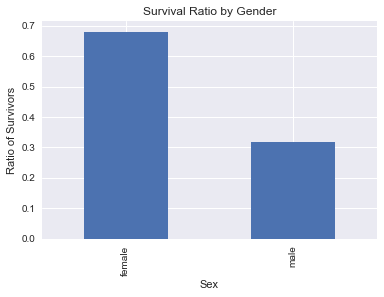

In [125]:
# Create chart
plt.title("Survival Ratio by Gender")
plt.ylabel("Ratio of Survivors")
plt.xlabel("Gender")
sex_survival.survive_ratio.plot(kind='bar');

So we can conclude that although women make up 35% of those onboard, they represent 68.1% of those who survived. Whereas men make up 65% of those aboard, but represent just 31.2% of those who survived.

Examine a relationship (if any) between a passenger's embarkment and their surival

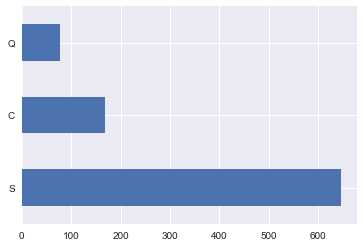

In [126]:
# Show emarkment figures
train_df.Embarked.value_counts(dropna=False).plot(kind='barh');

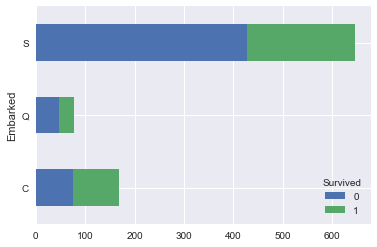

In [127]:
# Groupby embarked location and survival
train_df.groupby(['Embarked', 'Survived']).size().unstack(1).plot(kind='barh', stacked=True);

In [139]:
# Get the grouped data
embark_survival = train_df.groupby(['Embarked', 'Survived']).size().unstack(1)
embark_survival

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


In [140]:
embark_survival['survival_ratio'] = 0

In [141]:
# Clean up our columns
embark_survival.columns = ['0', '1', 'survival_ratio']

In [142]:
def fxn_1(df, new_column, compare_col):
    # Create empty column
    new_column = str(new_column)
    df[new_column] = 0.0
    
    # Get the index values
    index = list(df.index)
    
    # Loop through to find the relative proportion
    # Create a counter to ensure we make only 1 new column
    ctr = 0
    for idx in index:
        # If the ctr == len(index), then kill the loop
        if ctr == len(index):
            break
        
        else:
            df.loc[idx, new_column] = df.loc[idx, compare_col] / df[compare_col].sum()
        
        # Increment the ctr
        ctr = ctr + 1

    # Return the series
    return df[new_column]

In [143]:
# Build new series
embark_survival['survival_ratio'] = fxn_1(embark_survival, 'survival_ratio', '1')

# Check
embark_survival

,0,1,survival_ratio
Embarked,,,
C,75,93,0.271930
Q,47,30,0.087719
S,427,219,0.640351


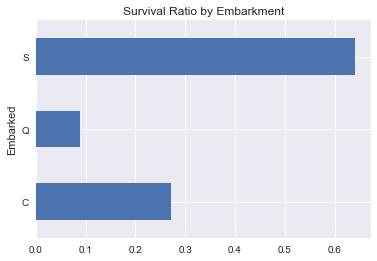

In [144]:
# Plot results
plt.title("Survival Ratio by Embarkment")
embark_survival.survival_ratio.plot(kind='barh');

In [145]:
# It's always good to look at your data occassionaly
train_df.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,S,1.0,0.0,0.0,0.0,1.0
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,S,0.0,1.0,0.0,0.0,1.0
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,S,0.0,1.0,0.0,0.0,1.0
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,C,1.0,0.0,1.0,0.0,0.0
180,181,0,3,"Sage, Miss. Constance Gladys",female,25.0,8,2,CA. 2343,69.5500,S,1.0,0.0,0.0,0.0,1.0
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,S,0.0,1.0,0.0,0.0,1.0
466,467,0,2,"Campbell, Mr. William",male,32.0,0,0,239853,0.0000,S,0.0,1.0,0.0,0.0,1.0
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,S,1.0,0.0,0.0,0.0,1.0
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,1.0,0.0,0.0,0.0,1.0
547,548,1,2,"Padro y Manent, Mr. Julian",male,27.0,0,0,SC/PARIS 2146,13.8625,C,0.0,1.0,1.0,0.0,0.0


In [136]:
# We need to create change the Sex column from categorical data to nominal data
train_df['female'] = pd.get_dummies(train_df.Sex)['female']
train_df['male'] = pd.get_dummies(train_df.Sex)['male']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,1.0


In [146]:
# Map the Embarked column from categorical to nominal numeric columns
train_df['C'] = pd.get_dummies(train_df.Embarked)['C']
train_df['Q'] = pd.get_dummies(train_df.Embarked)['Q']
train_df['S'] = pd.get_dummies(train_df.Embarked)['S']

In [148]:
# Check
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,1.0,0.0,0.0,1.0


#### Model the Data
- Now the data is (relatively) clean; let's model our data
- We will use _logloss_ as our metric

In [86]:
# Get the numeric data
X = train_df[['Pclass', 'female', 'male', 'Age', 'C', 'Q', 'S', 'SibSp', 'Parch', 'Fare']]
y = train_df.Survived

Implement a RandomForest Classifier and perform Cross-Validation on our data

In [97]:
# Get the tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Instantiate and CV
rf_cv_score = cross_val_score(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=2), X=X, y=y,
                            scoring='neg_log_loss', cv=10)

In [98]:
# Print the average log_loss
print('Avg log loss: {:.3f}'.format(-1 * np.mean(rf_cv_score)))

Avg log loss: 0.490


According to our 10-fold CV w/ the RandomForest classifier, we'll predict the accurate answer much better than randomly guessing.

Implement AdaBoost algorithm with Logistic Regression as the base estimators

In [157]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Instantiate
ada_logit = AdaBoostClassifier(base_estimator=LogisticRegression(C=0.1, n_jobs=2), n_estimators=400)

# CrossValidate
ada_logit_score = cross_val_score(estimator=ada_logit, X=X, y=y, scoring='neg_log_loss', cv=10)

In [156]:
# Print the average log_loss
print('Avg log loss: {:.3f}'.format(-1 * np.mean(ada_logit_score)))

Avg log loss: 0.693


Implement AdaBoost algorithm with Decision Trees as the base estimators

In [161]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate
adaboost = AdaBoostClassifier(n_estimators=1000)

# CrossValidate
adaboost_score = cross_val_score(estimator=adaboost, X=X, y=y, scoring='neg_log_loss', cv=10)

In [162]:
# Print the average log_loss
print('Avg log loss: {:.3f}'.format(-1 * np.mean(adaboost_score)))

Avg log loss: 0.691


Let's perform PCA analysis; typically, 3 to 5 principle components are common so let's do that.

In [166]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# PCA+logit pipeline
pca_logit_pipeline = Pipeline([('pca', PCA(n_components=3)), ('logit', LogisticRegression(C=0.1))])

# Crossvalidate the data
pca_logit_pipe_score = cross_val_score(estimator=pca_logit_pipeline, X=X, y=y, scoring='neg_log_loss',
                                      cv=10)

In [167]:
# Print the score
print("Avg log loss: {:.3f}".format(-1 * np.mean(pca_logit_pipe_score)))

Avg log loss: 0.618
